# 0. Initialize

In [49]:
import matplotlib.pyplot as plt
import numpy as np

from gym_poly_reactor.envs.poly_reactor_env import PolyReactor

In [50]:
%matplotlib inline

# 1. 환경 불러오기 (Gym-PolyReactor)

In [40]:
env = PolyReactor()

### 환경의 state / action_dimension을 체크
- 나중에 trajectory를 출력해보기 위함.

In [51]:
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.shape[0]

### 1-1. Main running code with random action


In [41]:
state = env.reset()

state_trajectory = []
action_trajectory = []

for _ in range(10000):
    action = env.action_space.sample()
    next_state, _, done, _ = env.step(action)

    state_trajectory.append(next_state)
    action_trajectory.append(action)

    if done:
        break

# 2. State, Action에 대한 Trajectory 확인해보기

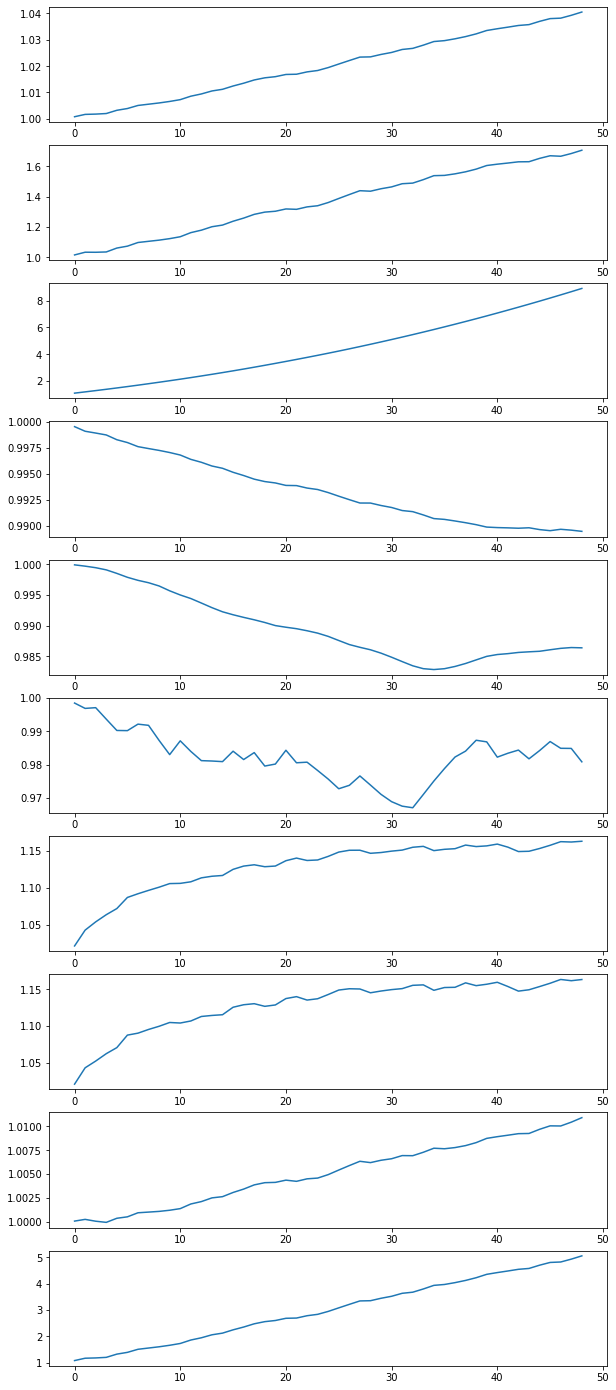

In [42]:
full_trajectory = np.array(state_trajectory)
fig, axs = plt.subplots(state_dim, 1, figsize=(10, 25))

for i, ax in enumerate(axs):
    ax.plot(full_trajectory[:, i])

plt.show()

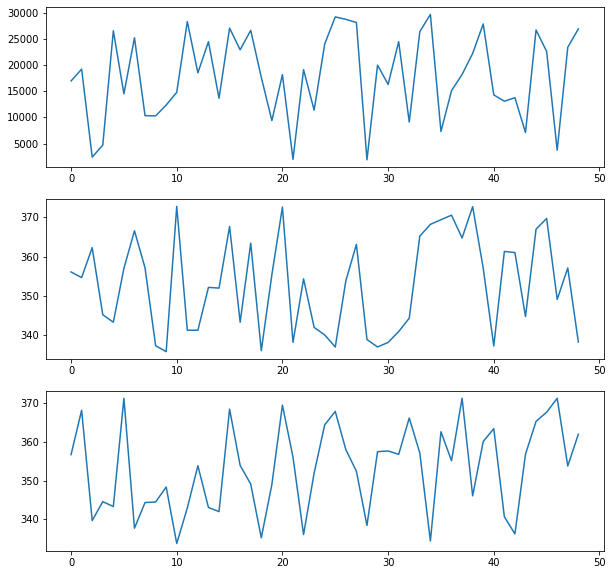

In [43]:
action_dim = env.action_space.shape[0]
action_trajectory = np.array(action_trajectory)

fig, axs = plt.subplots(action_dim, 1, figsize=(10, 10))

for i, ax in enumerate(axs):
    ax.plot(action_trajectory[:, i])

plt.show()